# Import required libraries

In [1]:

# Pandas for Data Manipulation
import pandas as pd
import numpy as np

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from math import sqrt

pd.set_option('display.max_columns', 50)

# Dataset Preparation

In [2]:
# Load 'Attendance' in a pandas dataframe 'Attendance'
Attendance = pd.read_excel('ATTENDANCE_DATAV1.xlsx')

# Sort dataframe on ATTDATE
Attendance = Attendance.sort_values(by='ATTDATE')

# Load 'HOLIDAY_LIST' in a pandas dataframe 'Holiday'
Holiday = pd.read_excel('HOLIDAY_DataV1.xlsx')

# Sort dataframe on ATTDATE
Holiday = Holiday.sort_values(by='ATTDATE')


In [3]:
# View Holiday data

Holiday

ATTDATE  CC  YearAligned  WeekAligned DayAligned WorkDay StatDay  City  \
0   2019-01-01 NaN         2019            1        Tue      No     Yes   NaN   
1   2019-01-02 NaN         2019            1        Wed     Yes      No   NaN   
2   2019-01-03 NaN         2019            1        Thu     Yes      No   NaN   
3   2019-01-04 NaN         2019            1        Fri     Yes      No   NaN   
4   2019-01-05 NaN         2019            1        Sat      No      No   NaN   
..         ...  ..          ...          ...        ...     ...     ...   ...   
725 2022-12-27 NaN         2022           53        Tue      No     Yes   NaN   
726 2022-12-28 NaN         2022           53        Wed     Yes      No   NaN   
727 2022-12-29 NaN         2022           53        Thu     Yes      No   NaN   
728 2022-12-30 NaN         2022           53        Fri     Yes      No   NaN   
729 2022-12-31 NaN         2022           53        Sat      No      No   NaN   

     Postal_Code  OtherPaidAbsences  PlannedAbsences  UnplannedAbsences  \
0            NaN                NaN              NaN                NaN   
1            NaN                NaN              NaN                NaN   
2            NaN                NaN              NaN                NaN   
3            NaN                NaN              NaN                NaN   
4            NaN                NaN              NaN                NaN   
..           ...                ...              ...                ...   
725          NaN                NaN              NaN                NaN   
726          NaN                NaN              NaN                NaN   
727          NaN                NaN              NaN                NaN   
728          NaN                NaN              NaN                NaN   
729          NaN                NaN              NaN                NaN   

     UnpaidAbsences  ScheduledHours  Target  
0               NaN             NaN     NaN  
1               NaN             NaN     NaN  
2               NaN             NaN     NaN  
3               NaN             NaN     NaN  
4               NaN             NaN     NaN  
..              ...             ...     ...  
725             NaN             NaN     NaN  
726             NaN             NaN     NaN  
727             NaN             NaN     NaN  
728             NaN             NaN     NaN  
729             NaN             NaN     NaN  

[730 rows x 15 columns]

In [4]:
#View the Attendance Data

Attendance

ATTDATE      CC  YearAligned  WeekAligned DayAligned WorkDay StatDay  \
0    2019-01-02  100636         2019            1        Wed     Yes      No   
1    2019-01-02  100712         2019            1        Wed     Yes      No   
2    2019-01-02  102628         2019            1        Wed     Yes      No   
3    2019-01-02  651222         2019            1        Wed     Yes      No   
4    2019-01-03  102628         2019            1        Thu     Yes      No   
...         ...     ...          ...          ...        ...     ...     ...   
1984 2022-12-29  102628         2022           53        Thu     Yes      No   
1988 2022-12-30  100636         2022           53        Fri     Yes      No   
1989 2022-12-30  102628         2022           53        Fri     Yes      No   
1987 2022-12-30  651222         2022           53        Fri     Yes      No   
1990 2022-12-30  100712         2022           53        Fri     Yes      No   

             CITY POSTAL_CODE  OtherPaidAbsences  PlannedAbsences  \
0     MISSISSAUGA     L5N 0C6               0.00            60.00   
1        RED DEER     T4P 3E8               0.00            72.00   
2        BROSSARD     J4W 0A4               1.75            51.23   
3        VICTORIA     V9B 3T0              16.00           104.00   
4        BROSSARD     J4W 0A4               9.75            68.27   
...           ...         ...                ...              ...   
1984     BROSSARD     J4W 0A4              24.00            45.70   
1988  MISSISSAUGA     L5N 0C6               8.00            64.97   
1989     BROSSARD     J4W 0A4              88.00           104.00   
1987     VICTORIA     V9B 3T0               4.60            84.32   
1990     RED DEER     T4P 3E8              16.00            56.00   

      UnplannedAbsences  UnpaidAbsences  ScheduledHours    Target  
0                 16.00            4.00          412.54  0.806079  
1                 36.00            0.00          407.99  0.735288  
2                 24.00           24.00          446.30  0.773740  
3                 38.90           17.38          687.40  0.743555  
4                 17.40            8.00          453.20  0.771801  
...                 ...             ...             ...       ...  
1984              18.00           14.00          441.27  0.769529  
1988               8.00            0.00          400.90  0.798029  
1989              64.53           13.47          839.00  0.678188  
1987              24.00            8.00          434.61  0.721774  
1990              24.53           16.00          426.44  0.736118  

[1991 rows x 15 columns]

In [5]:
# Merge two dataframes

Data = pd.merge(Attendance, Holiday, on ='ATTDATE', how='outer',sort='False' ) 

# Fill all NUll values with 0

Data.fillna(0, inplace=True)

# View Data
Data

ATTDATE      CC_x  YearAligned_x  WeekAligned_x DayAligned_x  \
0    2019-01-01       0.0            0.0            0.0            0   
1    2019-01-02  100636.0         2019.0            1.0          Wed   
2    2019-01-02  100712.0         2019.0            1.0          Wed   
3    2019-01-02  102628.0         2019.0            1.0          Wed   
4    2019-01-02  651222.0         2019.0            1.0          Wed   
...         ...       ...            ...            ...          ...   
2222 2022-12-30  100636.0         2022.0           53.0          Fri   
2223 2022-12-30  102628.0         2022.0           53.0          Fri   
2224 2022-12-30  651222.0         2022.0           53.0          Fri   
2225 2022-12-30  100712.0         2022.0           53.0          Fri   
2226 2022-12-31       0.0            0.0            0.0            0   

     WorkDay_x StatDay_x         CITY POSTAL_CODE  OtherPaidAbsences_x  \
0            0         0            0           0                 0.00   
1          Yes        No  MISSISSAUGA     L5N 0C6                 0.00   
2          Yes        No     RED DEER     T4P 3E8                 0.00   
3          Yes        No     BROSSARD     J4W 0A4                 1.75   
4          Yes        No     VICTORIA     V9B 3T0                16.00   
...        ...       ...          ...         ...                  ...   
2222       Yes        No  MISSISSAUGA     L5N 0C6                 8.00   
2223       Yes        No     BROSSARD     J4W 0A4                88.00   
2224       Yes        No     VICTORIA     V9B 3T0                 4.60   
2225       Yes        No     RED DEER     T4P 3E8                16.00   
2226         0         0            0           0                 0.00   

      PlannedAbsences_x  UnplannedAbsences_x  UnpaidAbsences_x  \
0                  0.00                 0.00              0.00   
1                 60.00                16.00              4.00   
2                 72.00                36.00              0.00   
3                 51.23                24.00             24.00   
4                104.00                38.90             17.38   
...                 ...                  ...               ...   
2222              64.97                 8.00              0.00   
2223             104.00                64.53             13.47   
2224              84.32                24.00              8.00   
2225              56.00                24.53             16.00   
2226               0.00                 0.00              0.00   

      ScheduledHours_x  Target_x  CC_y  YearAligned_y  WeekAligned_y  \
0                 0.00  0.000000   0.0           2019              1   
1               412.54  0.806079   0.0           2019              1   
2               407.99  0.735288   0.0           2019              1   
3               446.30  0.773740   0.0           2019              1   
4               687.40  0.743555   0.0           2019              1   
...                ...       ...   ...            ...            ...   
2222            400.90  0.798029   0.0           2022             53   
2223            839.00  0.678188   0.0           2022             53   
2224            434.61  0.721774   0.0           2022             53   
2225            426.44  0.736118   0.0           2022             53   
2226              0.00  0.000000   0.0           2022             53   

     DayAligned_y WorkDay_y StatDay_y  City  Postal_Code  OtherPaidAbsences_y  \
0             Tue        No       Yes   0.0          0.0                  0.0   
1             Wed       Yes        No   0.0          0.0                  0.0   
2             Wed       Yes        No   0.0          0.0                  0.0   
3             Wed       Yes        No   0.0          0.0                  0.0   
4             Wed       Yes        No   0.0          0.0                  0.0   
...           ...       ...       ...   ...          ...                  ...   
2222          Fri       Yes  

In [6]:
# Removing unrequired columns 

Data.drop(['WorkDay_x','StatDay_x','YearAligned_x','WeekAligned_x','DayAligned_x','CC_y','City','Postal_Code','OtherPaidAbsences_y','PlannedAbsences_y','UnplannedAbsences_y','UnpaidAbsences_y','ScheduledHours_y','Target_y'], axis=1)

# Re-indexing the columns for final Dataset

FinalDataV1 = Data.reindex(columns=['ATTDATE','CC_x','YearAligned_y','WeekAligned_y','DayAligned_y','WorkDay_y','StatDay_y','CITY','POSTAL_CODE','OtherPaidAbsences_x','PlannedAbsences_x','UnplannedAbsences_x','UnpaidAbsences_x','ScheduledHours_x','Target_x'])

#Rename the columns

FinalDataV1.rename(columns={'CC_x': 'CC', 'YearAligned_y': 'YearAligned', 'WeekAligned_y': 'WeekAligned', 'DayAligned_y': 'DayAligned', 'WorkDay_y': 'WorkDay', 'StatDay_y': 'StatDay','OtherPaidAbsences_x': 'OtherPaidAbsences', 'PlannedAbsences_x':'PlannedAbsences','UnplannedAbsences_x': 'UnplannedAbsences', 'UnpaidAbsences_x': 'UnpaidAbsences', 'ScheduledHours_x': 'ScheduledHours', 'Target_x':'Target'}, inplace=True)

# Change the data type of CC, YearAligned, WeekAligned to int

FinalDataV1['CC'] = FinalDataV1['CC'].astype(int)
FinalDataV1['YearAligned'] = FinalDataV1['YearAligned'].astype(int) 
FinalDataV1['WeekAligned'] = FinalDataV1['WeekAligned'].astype(int) 

# View FinalData

FinalDataV1

ATTDATE      CC  YearAligned  WeekAligned DayAligned WorkDay StatDay  \
0    2019-01-01       0         2019            1        Tue      No     Yes   
1    2019-01-02  100636         2019            1        Wed     Yes      No   
2    2019-01-02  100712         2019            1        Wed     Yes      No   
3    2019-01-02  102628         2019            1        Wed     Yes      No   
4    2019-01-02  651222         2019            1        Wed     Yes      No   
...         ...     ...          ...          ...        ...     ...     ...   
2222 2022-12-30  100636         2022           53        Fri     Yes      No   
2223 2022-12-30  102628         2022           53        Fri     Yes      No   
2224 2022-12-30  651222         2022           53        Fri     Yes      No   
2225 2022-12-30  100712         2022           53        Fri     Yes      No   
2226 2022-12-31       0         2022           53        Sat      No      No   

             CITY POSTAL_CODE  OtherPaidAbsences  PlannedAbsences  \
0               0           0               0.00             0.00   
1     MISSISSAUGA     L5N 0C6               0.00            60.00   
2        RED DEER     T4P 3E8               0.00            72.00   
3        BROSSARD     J4W 0A4               1.75            51.23   
4        VICTORIA     V9B 3T0              16.00           104.00   
...           ...         ...                ...              ...   
2222  MISSISSAUGA     L5N 0C6               8.00            64.97   
2223     BROSSARD     J4W 0A4              88.00           104.00   
2224     VICTORIA     V9B 3T0               4.60            84.32   
2225     RED DEER     T4P 3E8              16.00            56.00   
2226            0           0               0.00             0.00   

      UnplannedAbsences  UnpaidAbsences  ScheduledHours    Target  
0                  0.00            0.00            0.00  0.000000  
1                 16.00            4.00          412.54  0.806079  
2                 36.00            0.00          407.99  0.735288  
3                 24.00           24.00          446.30  0.773740  
4                 38.90           17.38          687.40  0.743555  
...                 ...             ...             ...       ...  
2222               8.00            0.00          400.90  0.798029  
2223              64.53           13.47          839.00  0.678188  
2224              24.00            8.00          434.61  0.721774  
2225              24.53           16.00          426.44  0.736118  
2226               0.00            0.00            0.00  0.000000  

[2227 rows x 15 columns]

In [7]:
# Uploading Weather Data

WData = pd.read_excel('WeatherDataCombined.xlsx')
WData = WData.sort_values(by='ATTDATE')

WData

ATTDATE  Mean_Temp  precipitation_sum (mm)  rain_sum (mm)  \
0    2019-01-01      -5.95               16.600002      11.300000   
730  2019-01-01       0.85                1.800000       1.800000   
2190 2019-01-01       3.95                0.000000       0.000000   
1460 2019-01-01      -7.60                0.500000       0.000000   
2191 2019-01-02       3.55                6.200000       6.200000   
...         ...        ...                     ...            ...   
728  2022-12-30       4.75                1.300000       1.300000   
1459 2022-12-31       5.45               17.700000      17.700000   
729  2022-12-31       4.70               11.599999      11.599999   
2189 2022-12-31      -8.30                0.000000       0.000000   
2919 2022-12-31       6.30                1.600000       1.600000   

      snowfall_sum (cm)  precipitation_hours (h)         CITY  
0                  3.71                        9     BROSSARD  
730                0.00                        4  MISSISSAUGA  
2190               0.00                        0     VICTORIA  
1460               0.35                        3     RED DEER  
2191               0.00                        8     VICTORIA  
...                 ...                      ...          ...  
728                0.00                        7     BROSSARD  
1459               0.00                       19  MISSISSAUGA  
729                0.00                       24     BROSSARD  
2189               0.00                        0     RED DEER  
2919               0.00                       11     VICTORIA  

[2920 rows x 7 columns]

In [8]:
# Merge the two dataframes FinalData and WData to prepare FinalDataset

FinalDataset = pd.merge(FinalDataV1, WData, on =['ATTDATE','CITY'], how='inner',sort='False' ) 

FinalDataset

ATTDATE      CC  YearAligned  WeekAligned DayAligned WorkDay StatDay  \
0    2019-01-02  102628         2019            1        Wed     Yes      No   
1    2019-01-02  100636         2019            1        Wed     Yes      No   
2    2019-01-02  100712         2019            1        Wed     Yes      No   
3    2019-01-02  651222         2019            1        Wed     Yes      No   
4    2019-01-03  102628         2019            1        Thu     Yes      No   
...         ...     ...          ...          ...        ...     ...     ...   
1986 2022-12-29  651222         2022           53        Thu     Yes      No   
1987 2022-12-30  102628         2022           53        Fri     Yes      No   
1988 2022-12-30  100636         2022           53        Fri     Yes      No   
1989 2022-12-30  100712         2022           53        Fri     Yes      No   
1990 2022-12-30  651222         2022           53        Fri     Yes      No   

             CITY POSTAL_CODE  OtherPaidAbsences  PlannedAbsences  \
0        BROSSARD     J4W 0A4               1.75            51.23   
1     MISSISSAUGA     L5N 0C6               0.00            60.00   
2        RED DEER     T4P 3E8               0.00            72.00   
3        VICTORIA     V9B 3T0              16.00           104.00   
4        BROSSARD     J4W 0A4               9.75            68.27   
...           ...         ...                ...              ...   
1986     VICTORIA     V9B 3T0               2.00            36.00   
1987     BROSSARD     J4W 0A4              88.00           104.00   
1988  MISSISSAUGA     L5N 0C6               8.00            64.97   
1989     RED DEER     T4P 3E8              16.00            56.00   
1990     VICTORIA     V9B 3T0               4.60            84.32   

      UnplannedAbsences  UnpaidAbsences  ScheduledHours    Target  Mean_Temp  \
0                 24.00           24.00          446.30  0.773740     -13.75   
1                 16.00            4.00          412.54  0.806079      -4.20   
2                 36.00            0.00          407.99  0.735288       1.95   
3                 38.90           17.38          687.40  0.743555       3.55   
4                 17.40            8.00          453.20  0.771801      -9.00   
...                 ...             ...             ...       ...        ...   
1986              54.00           10.00          687.38  0.851610       5.60   
1987              64.53           13.47          839.00  0.678188       4.75   
1988               8.00            0.00          400.90  0.798029       9.30   
1989              24.53           16.00          426.44  0.736118     -11.80   
1990              24.00            8.00          434.61  0.721774       7.00   

      precipitation_sum (mm)  rain_sum (mm)  snowfall_sum (cm)  \
0                   0.200000       0.000000               0.21   
1                   1.700000       0.000000               1.26   
2                   0.000000       0.000000               0.00   
3                   6.200000       6.200000               0.00   
4                   3.500000       0.000000               2.52   
...                      ...            ...                ...   
1986                3.500000       3.500000               0.00   
1987                1.300000       1.300000               0.00   
1988                2.800000       2.800000               0.00   
1989                0.000000       0.000000               0.00   
1990               11.800004      11.800004               0.00   

      precipitation_hours (h)  
0                           1  
1                           6  
2                           0  
3                           8  
4                           7  
...                       ...  
1986                       13  
1987                        7  
1988                       11  
1989                        0  
1990                       23  

[1991 rows x 20 columns]

In [9]:
# Formatting Columns
FinalDataset['Target'] = FinalDataset['Target'] * 100
FinalDataset['Target'] = FinalDataset['Target'].apply(lambda x: round(x,2))
FinalDataset['Mean_Temp'] = FinalDataset['Mean_Temp'].apply(lambda x: round(x,2))
FinalDataset['precipitation_sum (mm)']= FinalDataset['precipitation_sum (mm)'].apply(lambda x: round(x,2))
FinalDataset['rain_sum (mm)']= FinalDataset['rain_sum (mm)'].apply(lambda x: round(x,2))
FinalDataset['snowfall_sum (cm)'] = FinalDataset['snowfall_sum (cm)'].apply(lambda x: round(x,2))

#Print FinalDataset
FinalDataset

ATTDATE      CC  YearAligned  WeekAligned DayAligned WorkDay StatDay  \
0    2019-01-02  102628         2019            1        Wed     Yes      No   
1    2019-01-02  100636         2019            1        Wed     Yes      No   
2    2019-01-02  100712         2019            1        Wed     Yes      No   
3    2019-01-02  651222         2019            1        Wed     Yes      No   
4    2019-01-03  102628         2019            1        Thu     Yes      No   
...         ...     ...          ...          ...        ...     ...     ...   
1986 2022-12-29  651222         2022           53        Thu     Yes      No   
1987 2022-12-30  102628         2022           53        Fri     Yes      No   
1988 2022-12-30  100636         2022           53        Fri     Yes      No   
1989 2022-12-30  100712         2022           53        Fri     Yes      No   
1990 2022-12-30  651222         2022           53        Fri     Yes      No   

             CITY POSTAL_CODE  OtherPaidAbsences  PlannedAbsences  \
0        BROSSARD     J4W 0A4               1.75            51.23   
1     MISSISSAUGA     L5N 0C6               0.00            60.00   
2        RED DEER     T4P 3E8               0.00            72.00   
3        VICTORIA     V9B 3T0              16.00           104.00   
4        BROSSARD     J4W 0A4               9.75            68.27   
...           ...         ...                ...              ...   
1986     VICTORIA     V9B 3T0               2.00            36.00   
1987     BROSSARD     J4W 0A4              88.00           104.00   
1988  MISSISSAUGA     L5N 0C6               8.00            64.97   
1989     RED DEER     T4P 3E8              16.00            56.00   
1990     VICTORIA     V9B 3T0               4.60            84.32   

      UnplannedAbsences  UnpaidAbsences  ScheduledHours  Target  Mean_Temp  \
0                 24.00           24.00          446.30   77.37     -13.75   
1                 16.00            4.00          412.54   80.61      -4.20   
2                 36.00            0.00          407.99   73.53       1.95   
3                 38.90           17.38          687.40   74.36       3.55   
4                 17.40            8.00          453.20   77.18      -9.00   
...                 ...             ...             ...     ...        ...   
1986              54.00           10.00          687.38   85.16       5.60   
1987              64.53           13.47          839.00   67.82       4.75   
1988               8.00            0.00          400.90   79.80       9.30   
1989              24.53           16.00          426.44   73.61     -11.80   
1990              24.00            8.00          434.61   72.18       7.00   

      precipitation_sum (mm)  rain_sum (mm)  snowfall_sum (cm)  \
0                        0.2            0.0               0.21   
1                        1.7            0.0               1.26   
2                        0.0            0.0               0.00   
3                        6.2            6.2               0.00   
4                        3.5            0.0               2.52   
...                      ...            ...                ...   
1986                     3.5            3.5               0.00   
1987                     1.3            1.3               0.00   
1988                     2.8            2.8               0.00   
1989                     0.0            0.0               0.00   
1990                    11.8           11.8               0.00   

      precipitation_hours (h)  
0                           1  
1                           6  
2                           0  
3                           8  
4                           7  
...                       ...  
1986                       13  
1987                        7  
1988                       11  
1989                        0  
1990                       23  

[1991 rows x 20 columns]

In [10]:
# Save the FinalDataset as excel file

FinalDataset.to_excel('FinalDataset.xlsx', index=False)

# Exploratory Data Analysis(EDA)


In [11]:
# EDA

FinalDataset.dtypes

ATTDATE                    datetime64[ns]
CC                                  int32
YearAligned                         int32
WeekAligned                         int32
DayAligned                         object
WorkDay                            object
StatDay                            object
CITY                               object
POSTAL_CODE                        object
OtherPaidAbsences                 float64
PlannedAbsences                   float64
UnplannedAbsences                 float64
UnpaidAbsences                    float64
ScheduledHours                    float64
Target                            float64
Mean_Temp                         float64
precipitation_sum (mm)            float64
rain_sum (mm)                     float64
snowfall_sum (cm)                 float64
precipitation_hours (h)             int64
dtype: object

In [12]:
# Check correlation between different features

sns.heatmap(FinalDataset.corr(), cmap='coolwarm')

C:\Users\sumit\AppData\Local\Temp\ipykernel_54380\3601851613.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(FinalDataset.corr(), cmap='coolwarm')


<AxesSubplot:>

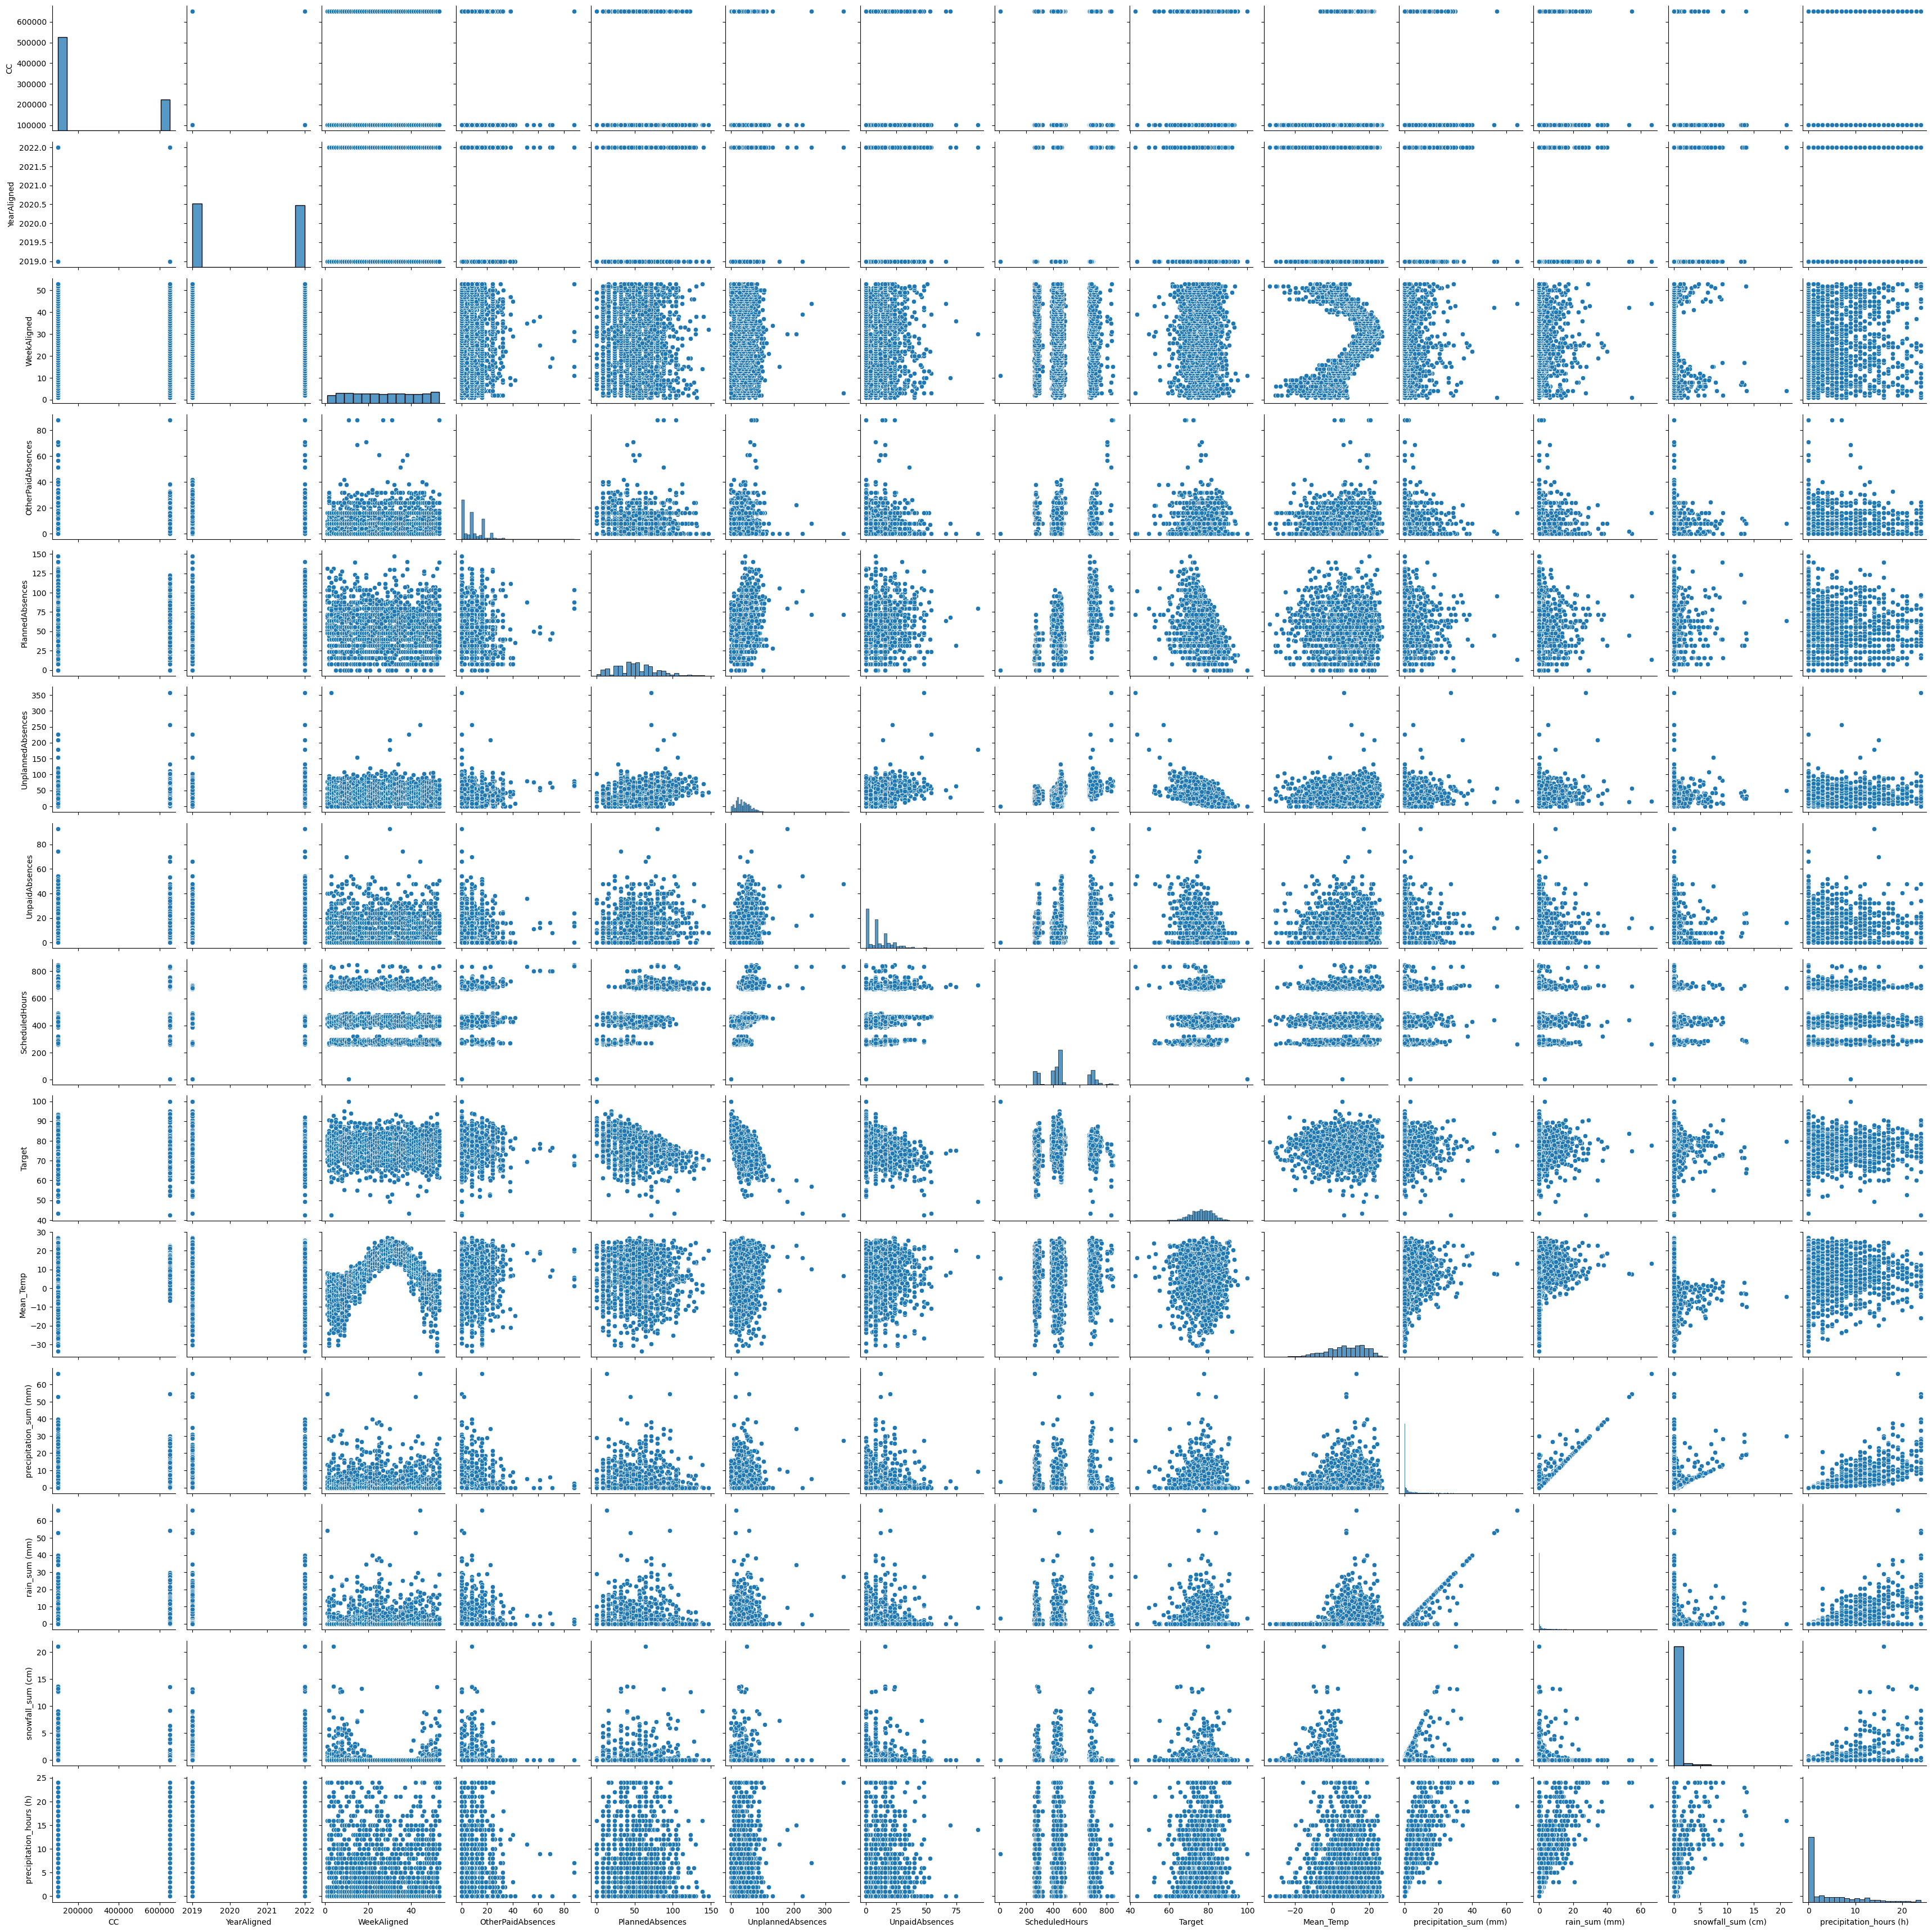

In [13]:
# Plot histogram grid using seaborn pairplot

sns.pairplot(data=FinalDataset)

# Clear the text "residue" and show the plot

plt.show()

In [14]:
# Scatter Plot to see relation between Mean_Temo, snowfall_sum (cm), and Target 

sns.set(font_scale=2)

sns.set_style('whitegrid')
plt.figure(figsize=(16, 9))
sns.scatterplot(data=FinalDataset, x='Mean_Temp',y='Target', hue='snowfall_sum (cm)',palette='cool', legend=True)
plt.show()

# Simple Linear Regression Model

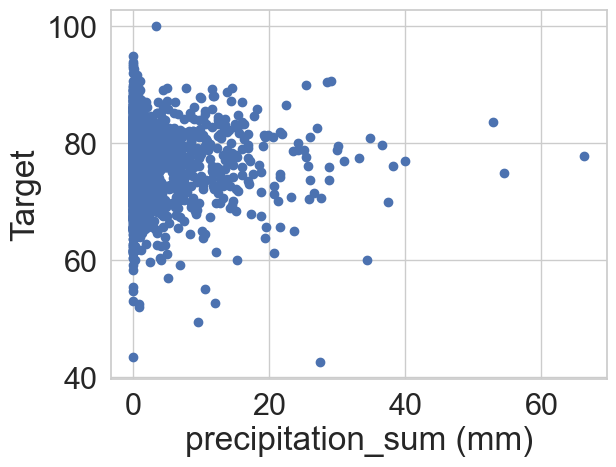

In [15]:
# Simple linear regression on the feature precipitation_sum (mm) and target

#Separate feature and target in differnt dataframes.

Precip = FinalDataset[['precipitation_sum (mm)']]
Target = FinalDataset[['Target']]

# Plot the data
plt.scatter(Precip,Target)
plt.xlabel('precipitation_sum (mm)')
plt.ylabel('Target')
plt.show()



In [16]:

# Split the data into features (X) and target (y)

X = FinalDataset[['precipitation_sum (mm)']].values.reshape(-1, 1)  # Reshape to 2D array
y = FinalDataset[['Target']].values

# Split the data into training and testing sets (75-25 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initialize the linear regression model
SLRmodel = LinearRegression()

# Fit the model to the training data
SLRmodel.fit(X_train, y_train)

# Predict on the test data
y_pred = SLRmodel.predict(X_test)

# Predict on the train data
tr_pred = SLRmodel.predict(X_train)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_train, tr_pred)

# Calculate the mean absolute error (MAE)
mae1 = mean_absolute_error(y_test, y_pred)


# evaluate the model

print('Train error of Simple Linear Regression Model is:', mae)

print("Test error of Simple Linear Regression Model is:", mae1)





Train error of Simple Linear Regression Model is: 4.827297638202083
Test error of Simple Linear Regression Model is: 4.694156110935255


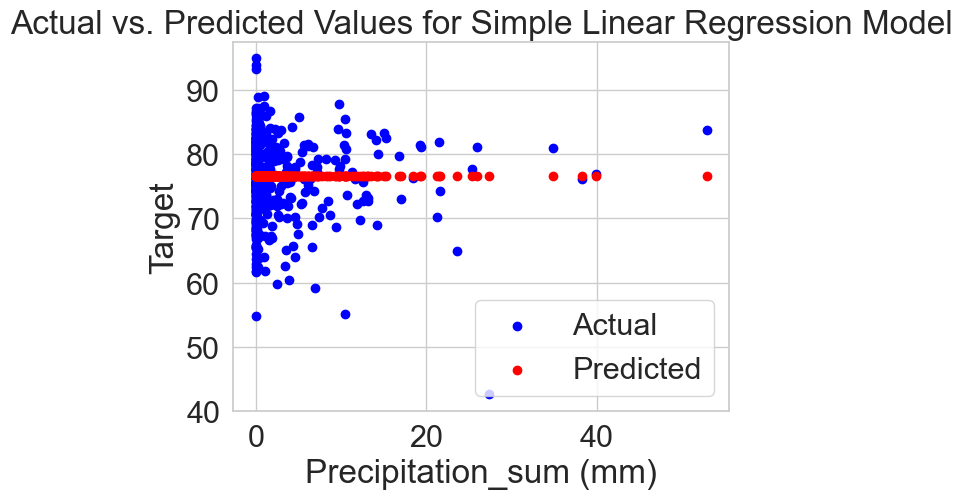

In [17]:
# Plot the actual vs. predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color = 'red', label = 'Predicted')
plt.xlabel('Precipitation_sum (mm)')
plt.ylabel('Target')
plt.legend(['Actual', 'Predicted'], loc='lower right')
plt.title('Actual vs. Predicted Values for Simple Linear Regression Model')
plt.show()

In [18]:
# Straight line definately doesnot fit.
# Let's generate polynomial equation with degree 2

pf2 = PolynomialFeatures(degree=2, include_bias=False)
x2 = pf2.fit_transform(X)
x2.shape

(1991, 2)

In [19]:
# train the model
lr2 = LinearRegression()
model2 = lr2.fit(x2, y)

# make predictions using the model
y_pred2 = model2.predict(x2)

#Check Error
mae2 = mean_absolute_error(y, y_pred2)
mae2

4.796620611138002

The MAE increased from 4.69 to 4.79 when Polynomial equation's degree is increased to 2


As Simple Linear Regression Model has Train error of: 4.827297638202083 and Test error of: 4.694156110935255 
when predicted on feature Precipitaion_sum against Target, We'll look in another ML models to find the more optimal model.

# Multiple Linear Regression Model

In [20]:
# Select features from FinalDataset to be fed into Multiple Linear Regression Machine Learning model.

ModelData = FinalDataset.loc[:, ['ATTDATE','WeekAligned', 'PlannedAbsences', 'UnplannedAbsences', 'ScheduledHours', 'Mean_Temp', 'snowfall_sum (cm)','Target']]

# Split data (train-test on 85-15%)

train = ModelData[ModelData['ATTDATE'] < '2022-9-15']
test = ModelData[ModelData['ATTDATE'] >= '2022-9-15']

# extract the features (columns except the target variable) into a feature matrix 
# extract the target variable into a target vector

X_train = train.drop(['ATTDATE', 'Target'], axis=1)
y_train = train['Target']
X_test = test.drop(['ATTDATE', 'Target'], axis=1)
y_test = test['Target']



# print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)



Training set shape: (1707, 6) (1707,)
Test set shape: (284, 6) (284,)


In [21]:
# train the model
lrmodel = LinearRegression().fit(X_train,y_train)

# make preditions on train set
train_pred = lrmodel.predict(X_train)

# evaluate the model

train_mae = mean_absolute_error(train_pred, y_train)
print('Train error of Multiple Linear Regression Model is:', train_mae)

# make predictions om test set
ypred = lrmodel.predict(X_test)

#evaluate the model
test_mae = mean_absolute_error(ypred, y_test)
print('Test error of Multiple Linear Regression Model is:', test_mae)

Train error of Multiple Linear Regression Model is: 2.4244687588696974
Test error of Multiple Linear Regression Model is: 2.382408796341536


In [22]:
# Predictive vs Expected Analysis of Multiple Linear Regression

Expected = y_test 
PredExp = []
for p, e in zip(ypred[::5], Expected[::5]):  # check every 5th element 

  print(f'Predicted: {p:.2f}, Expected: {e:.2f}') 
  PredExp.append({'Predicted': p, 'Expected': e})


'''lambda implements y = mx + b '''

predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_) 

Predicted: 70.09, Expected: 65.71
Predicted: 88.25, Expected: 87.43
Predicted: 75.90, Expected: 74.15
Predicted: 70.81, Expected: 70.69
Predicted: 64.21, Expected: 67.11
Predicted: 80.84, Expected: 80.35
Predicted: 77.85, Expected: 80.00
Predicted: 70.99, Expected: 70.55
Predicted: 68.88, Expected: 73.66
Predicted: 85.09, Expected: 83.15
Predicted: 75.22, Expected: 76.96
Predicted: 79.98, Expected: 79.23
Predicted: 71.97, Expected: 72.17
Predicted: 82.46, Expected: 84.14
Predicted: 75.68, Expected: 75.00
Predicted: 74.94, Expected: 76.34
Predicted: 75.79, Expected: 74.34
Predicted: 80.10, Expected: 78.57
Predicted: 77.24, Expected: 74.74
Predicted: 70.18, Expected: 73.68
Predicted: 74.88, Expected: 75.01
Predicted: 78.73, Expected: 80.00
Predicted: 72.41, Expected: 70.59
Predicted: 74.80, Expected: 70.39
Predicted: 77.14, Expected: 79.41
Predicted: 82.38, Expected: 82.20
Predicted: 83.77, Expected: 83.09
Predicted: 82.06, Expected: 79.23
Predicted: 78.64, Expected: 77.32
Predicted: 69.

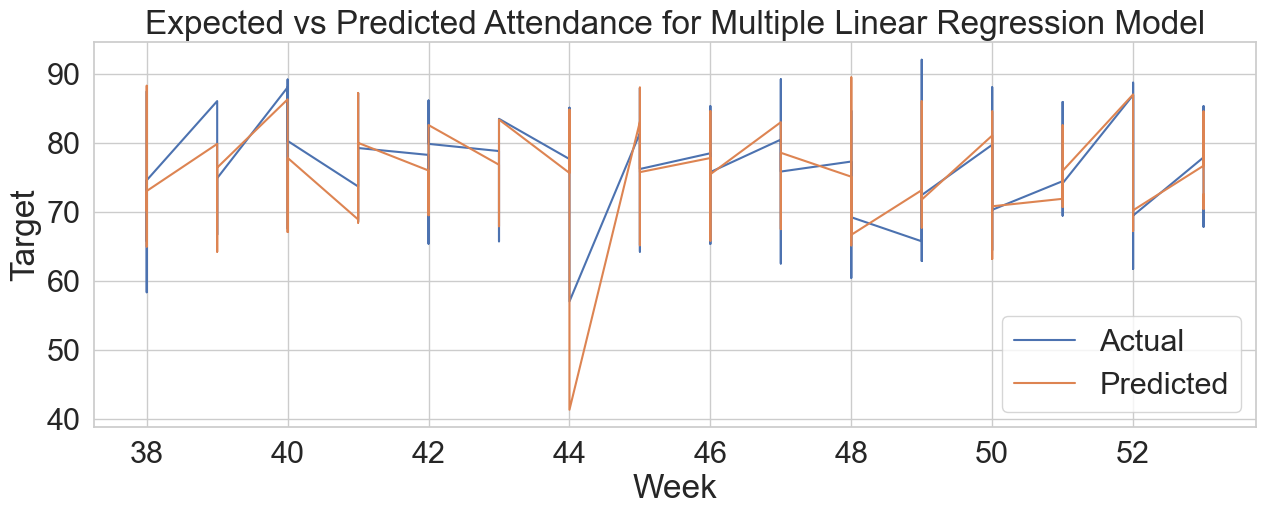

In [23]:
# Graph for Expected vs Predicted Attendance for Multiple Linear Regression Model

# plot the actual and predicted values for test data for 2019-2022 data

plt.figure(figsize= (15,5))
plt.plot(X_test['WeekAligned'], y_test, label='Actual')
plt.plot(X_test['WeekAligned'], ypred, label='Predicted')

# set the plot labels and legend

plt.xlabel('Week')
plt.ylabel('Target')
plt.title('Expected vs Predicted Attendance for Multiple Linear Regression Model')
plt.legend(loc='lower right')

# display the plot
plt.show()




Train error of Multiple Linear Regression Model is: 2.3865713998861477
Test error of Multiple Linear Regression Model is: 2.503852763490651

Which is much better as compared to Simple Linear Regression Model which was 
Train error of: 4.827297638202083 and Test error of: 4.694156110935255 

But we'll look for another ML model.

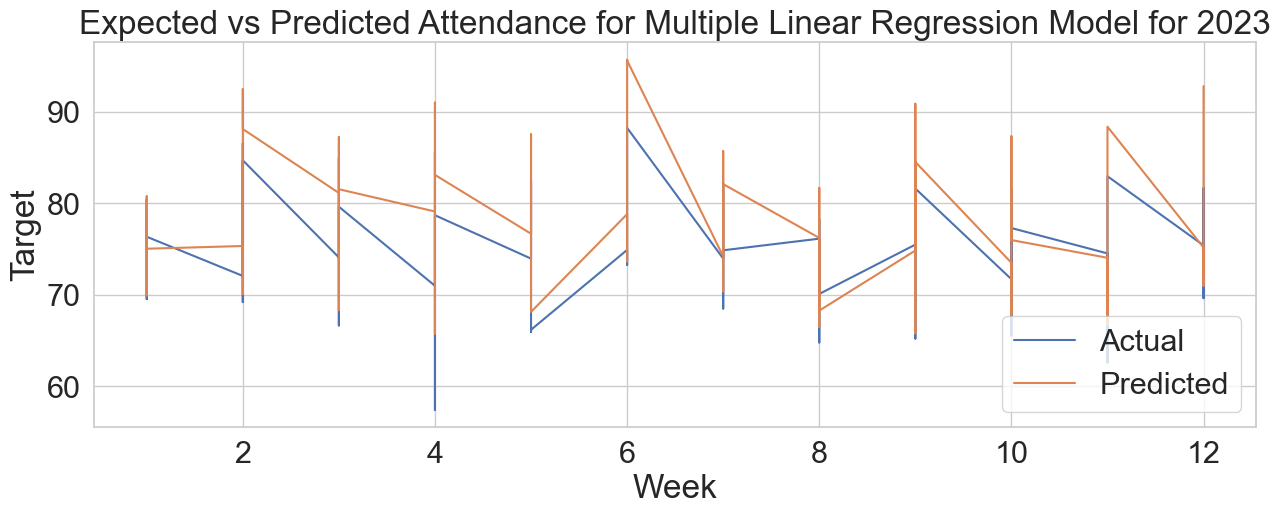

In [24]:
# Cross Validation on 2023 Dataset for Multiple Linear Regression model

Data23 = pd.read_excel('TestData23.xlsx')

Test23 = Data23.loc[:, ['ATTDATE', 'WeekAligned', 'PlannedAbsences', 'UnplannedAbsences', 'ScheduledHours', 'Mean_Temp', 'snowfall_sum (cm)','Target']]

X_23= Test23.drop(['ATTDATE', 'Target'], axis=1)
y_23 = Test23['Target']

# make predictions on 2023 data

y_pred23 = lrmodel.predict(X_23)


# plot Expected vs Actual for data 2023

plt.figure(figsize= (15,5))
plt.plot(X_23['WeekAligned'], y_23, label='Actual')
plt.plot(X_23['WeekAligned'], y_pred23, label='Predicted')
# set the plot labels and legend
plt.xlabel('Week')
plt.ylabel('Target')
plt.title('Expected vs Predicted Attendance for Multiple Linear Regression Model for 2023')
plt.legend(loc='lower right')


# display the plot
plt.show()

# XGBoost (eXtreme Gradient Boosting)

In [25]:
# Select features from FinalDataset to be fed into Machine Learning model.
# we addes ATTDATE because we want to split the train and test data set non-randomly. It is fixed on ATTDATE 2022-09-07

ModelDataXG = FinalDataset.loc[:, ['ATTDATE', 'WeekAligned', 'OtherPaidAbsences','PlannedAbsences','UnplannedAbsences','UnpaidAbsences','ScheduledHours', 'Mean_Temp', 'rain_sum (mm)','snowfall_sum (cm)','precipitation_sum (mm)','Target']]

# Splitting data in train set and test set on 25%

train = ModelDataXG[ModelDataXG['ATTDATE'] < '2022-09-07']
test = ModelDataXG[ModelDataXG['ATTDATE'] >= '2022-09-07']

#Creating features for the model. 
#XGBoost requires numeric features, so we drop ATTDATE which is in DateTime format

X_trainXG = train.drop(['ATTDATE', 'Target'], axis=1)
y_trainXG = train['Target']
X_testXG = test.drop(['ATTDATE', 'Target'], axis=1)
y_testXG = test['Target']

#Train the XGBoost model.

params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

modelXG = xgb.XGBRegressor(**params)

# Fit and train the model
modelXG.fit(X_trainXG, y_trainXG)

#Make predictions on the test set.
y_predXG = modelXG.predict(X_testXG)

#Make predictions on the train set.
y_pred_trainXG = modelXG.predict(X_trainXG)


In [26]:
#Evaluation of model's performance.

mae_testXG = mean_absolute_error(y_testXG, y_predXG)

print('Test error of XGBoost Model is: %.3f' % mae_testXG)

mae_trainXG = mean_absolute_error(y_trainXG, y_pred_trainXG)

print('Train error of XGBoost Model is: %.3f' % mae_trainXG)


Test error of XGBoost Model is: 1.251
Train error of XGBoost Model is: 0.796


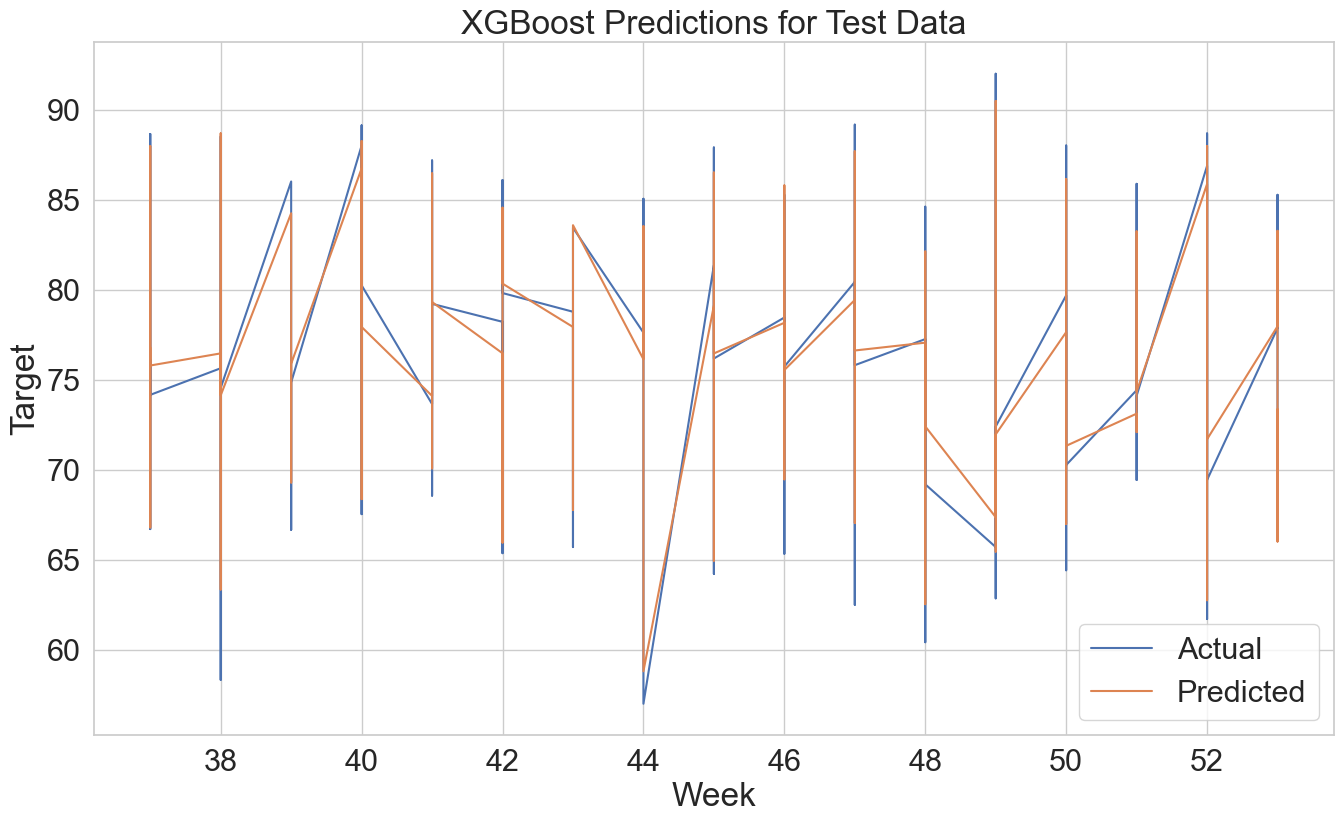

In [27]:
# plot the actual and predicted values TEST DATA

plt.figure(figsize=(16, 9))
plt.plot(test['WeekAligned'], y_testXG, label='Actual')
plt.plot(test['WeekAligned'], y_predXG, label='Predicted')

# set the plot labels and legend
plt.xlabel('Week')
plt.ylabel('Target')
plt.title('XGBoost Predictions for Test Data')
plt.legend(loc='lower right')

# display the plot
plt.show()

To See the similarity between 2019 and 2022 data and how the model is behaving on both years, We tried the XGBoost on 2019 and 2022 data separately.

In [28]:
# Separate main dataset for XG model into two different dataframes for 2019 and 2022 data each

Data19 = ModelDataXG[ModelDataXG['ATTDATE'] < '2022-01-01']
Data22 = ModelDataXG[ModelDataXG['ATTDATE'] >= '2022-01-01']

In [29]:
# Split the train and test set(85%-15%)

train19 = Data19[Data19['ATTDATE'] <= '2019-11-02']
test19 = Data19[Data19['ATTDATE'] > '2019-11-02']

train22 = Data22[Data22['ATTDATE'] <= '2022-11-02']
test22 = Data22[Data22['ATTDATE'] > '2022-11-02']

#Creating features for the model. 
#XGBoost requires numeric features, so we drop ATTDATE which is in DateTime format

X_train19 = train19.drop(['ATTDATE', 'Target'], axis=1)
y_train19 = train19['Target']
X_test19 = test19.drop(['ATTDATE', 'Target'], axis=1)
y_test19 = test19['Target']


X_train22 = train22.drop(['ATTDATE', 'Target'], axis=1)
y_train22 = train22['Target']
X_test22 = test22.drop(['ATTDATE', 'Target'], axis=1)
y_test22 = test22['Target']

#Train the XGBoost model.

params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# XGBoost for 2019

model19 = xgb.XGBRegressor(**params)
model19.fit(X_train19, y_train19)

# XGBoost for 2022

model22 = xgb.XGBRegressor(**params)
model22.fit(X_train22, y_train22)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [30]:
#Make predictions on the test set for 2019 
y_pred19 = model19.predict(X_test19)

#Make predictions on the train set for 2019
y_pred_train19 = model19.predict(X_train19)

#Make predictions on the test set for 2022
y_pred22 = model22.predict(X_test22)

#Make predictions on the train set for 2022.
y_pred_train22 = model22.predict(X_train22)



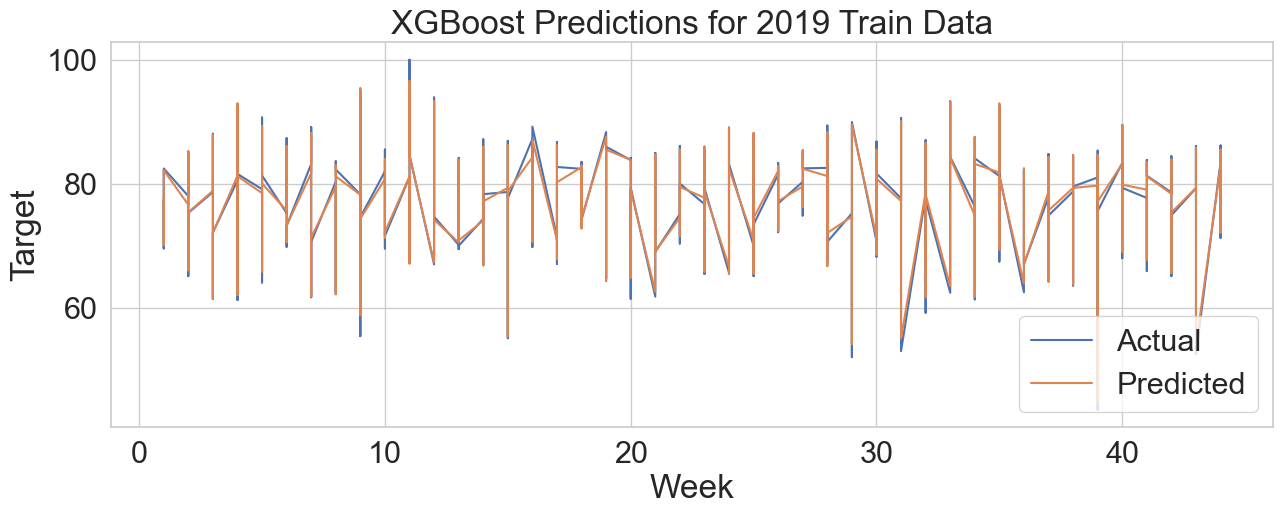

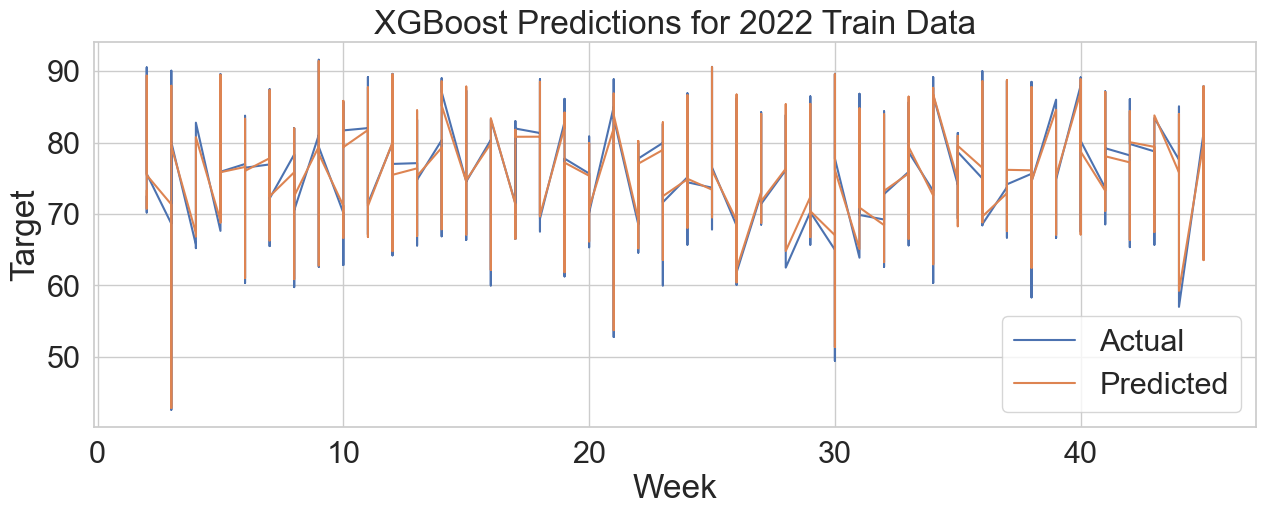

In [31]:
# plot the actual and predicted values for train data for 2019

plt.figure(figsize= (15,5))
plt.plot(train19['WeekAligned'], y_train19, label='Actual')
plt.plot(train19['WeekAligned'], y_pred_train19, label='Predicted')
# set the plot labels and legend
plt.xlabel('Week')
plt.ylabel('Target')
plt.title('XGBoost Predictions for 2019 Train Data')
plt.legend(loc='lower right')


# display the plot
plt.show()


# plot the actual and predicted values for train data for 2022

plt.figure(figsize= (15,5))
plt.plot(train22['WeekAligned'], y_train22, label='Actual')
plt.plot(train22['WeekAligned'], y_pred_train22, label='Predicted')
# set the plot labels and legend
plt.xlabel('Week')
plt.ylabel('Target')
plt.title('XGBoost Predictions for 2022 Train Data')
plt.legend(loc='lower right')


# display the plot
plt.show()

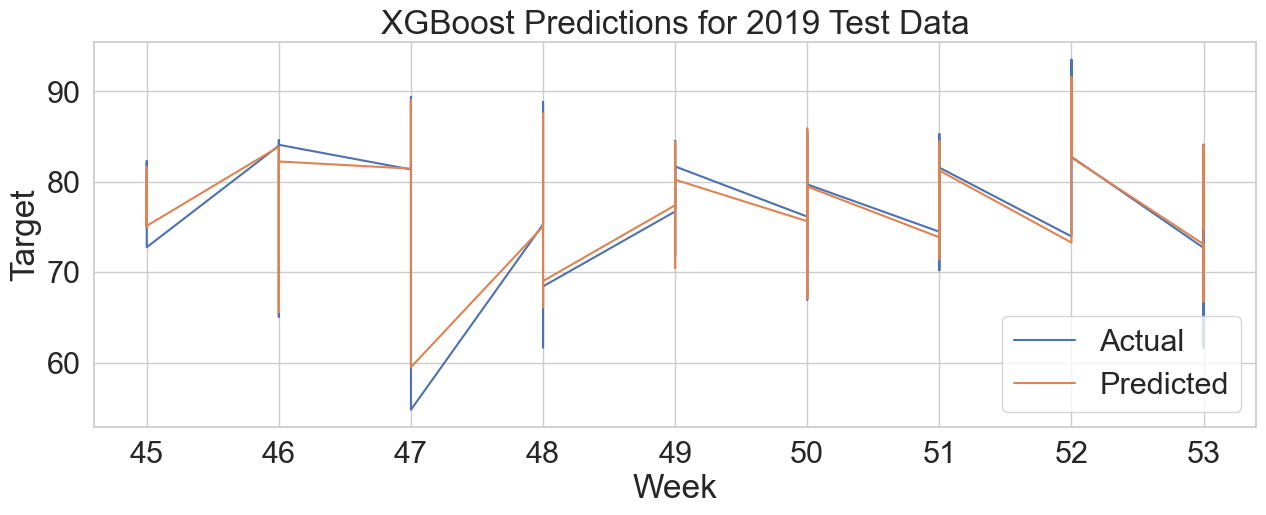

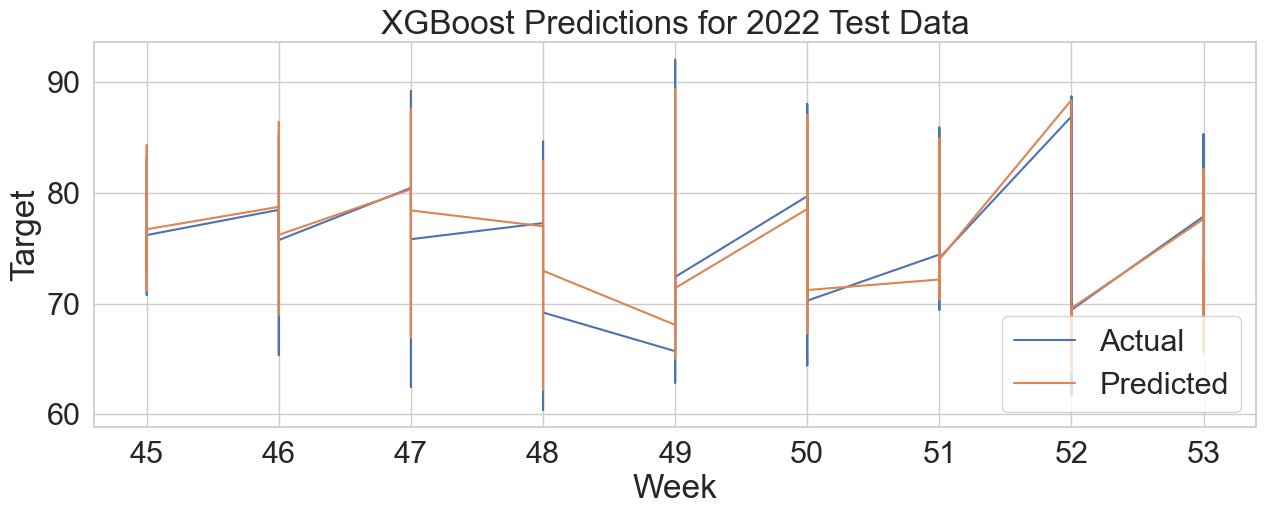

In [32]:
# plot the actual and predicted values test data

plt.figure(figsize= (15,5))
plt.plot(test19['WeekAligned'], y_test19, label='Actual')
plt.plot(test19['WeekAligned'], y_pred19, label='Predicted')

# set the plot labels and legend

plt.xlabel('Week')
plt.ylabel('Target')
plt.title('XGBoost Predictions for 2019 Test Data')
plt.legend(loc= 'lower right')


# display the plot

plt.show()

y_pred22 = model22.predict(X_test22)

# plot the actual and predicted values

plt.figure(figsize= (15,5))
plt.plot(test22['WeekAligned'], y_test22, label='Actual')
plt.plot(test22['WeekAligned'], y_pred22, label='Predicted')

# set the plot labels and legend

plt.xlabel('Week')
plt.ylabel('Target')
plt.title('XGBoost Predictions for 2022 Test Data')
plt.legend(loc= 'lower right')


# display the plot

plt.show()

Test error of XGBoost Model is: 1.251

Train error of XGBoost Model is: 0.796

This is a good model, but we will also try Gradient Boost Regressor Model


In [33]:
# Cross Validation of XGBoost Machine learning model: Prediction on 2023 data

Data23 = pd.read_excel('TestData23.xlsx')

Test23 = Data23.loc[:, ['ATTDATE', 'WeekAligned', 'OtherPaidAbsences','PlannedAbsences','UnplannedAbsences','UnpaidAbsences','ScheduledHours', 'Mean_Temp', 'rain_sum (mm)','snowfall_sum (cm)','precipitation_sum (mm)','Target']]

X_XG23= Test23.drop(['ATTDATE', 'Target'], axis=1)
y_XG23 = Test23['Target']

y_predXG23 = modelXG.predict(X_XG23)


In [34]:
#Predictive Analysis and Results

Expected = y_XG23 
PredExp = []
for p, e in zip(y_predXG23[::5], Expected[::5]):  # check every 5th element 

  print(f'Predicted: {p:.2f}, Expected: {e:.2f}') 
  PredExp.append({'Predicted': p, 'Expected': e})


'''lambda implements y = mx + b '''

predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_) 

Predicted: 78.42, Expected: 78.40
Predicted: 77.63, Expected: 74.65
Predicted: 72.83, Expected: 69.55
Predicted: 77.12, Expected: 76.36
Predicted: 78.52, Expected: 78.93
Predicted: 79.64, Expected: 81.02
Predicted: 77.34, Expected: 75.88
Predicted: 79.73, Expected: 84.71
Predicted: 76.73, Expected: 74.32
Predicted: 77.87, Expected: 79.63
Predicted: 76.64, Expected: 77.78
Predicted: 78.20, Expected: 79.64
Predicted: 75.30, Expected: 68.10
Predicted: 80.38, Expected: 81.48
Predicted: 72.09, Expected: 67.54
Predicted: 77.70, Expected: 78.71
Predicted: 78.90, Expected: 78.46
Predicted: 78.93, Expected: 79.63
Predicted: 70.85, Expected: 70.26
Predicted: 73.72, Expected: 66.20
Predicted: 76.91, Expected: 74.38
Predicted: 76.09, Expected: 73.30
Predicted: 76.35, Expected: 76.72
Predicted: 83.62, Expected: 88.26
Predicted: 79.20, Expected: 79.50
Predicted: 75.44, Expected: 75.00
Predicted: 77.19, Expected: 78.88
Predicted: 75.79, Expected: 74.88
Predicted: 74.79, Expected: 71.88
Predicted: 71.

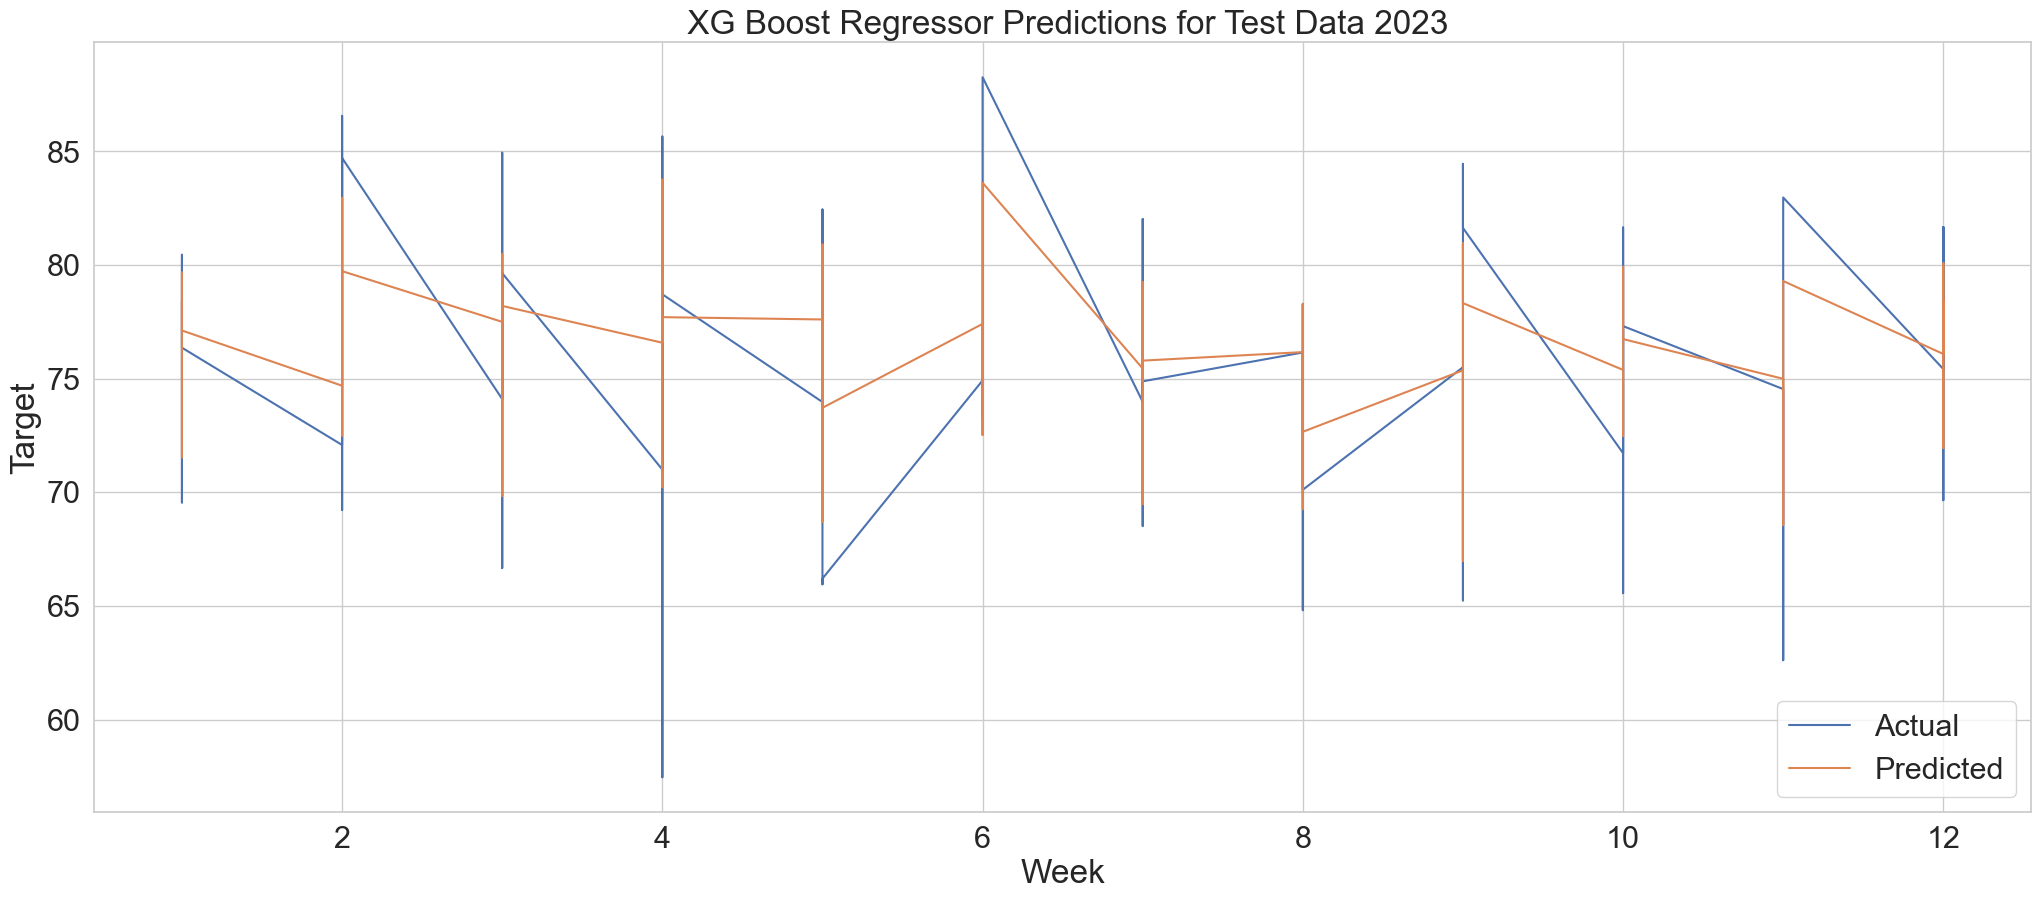

In [35]:
# Graph for Expected vs Predicted Attendance for XG Boost Regressor for Test Data 2023

plt.figure(figsize= (25,10))
plt.plot(X_XG23['WeekAligned'], y_XG23, label='Actual')
plt.plot(X_XG23['WeekAligned'], y_predXG23, label='Predicted')

# set the plot labels and legend

plt.xlabel('Week')
plt.ylabel('Target')
plt.title(' XG Boost Regressor Predictions for Test Data 2023')
plt.legend(loc= 'lower right')

# display the plot

plt.show()

# Gradient Boosting Regression Model

In [36]:
# # Select the important features to feed Gradient Boosting Regression Model

GBRdata1 = FinalDataset.loc[:, ['ATTDATE', 'WeekAligned', 'PlannedAbsences','OtherPaidAbsences','UnpaidAbsences', 'UnplannedAbsences', 'ScheduledHours', 'Mean_Temp', 'snowfall_sum (cm)','Target']]

# Splitting data in train set and test set on 15% (non-random) on ATTDATE 2022-09-15

trainGBR1 = GBRdata1[GBRdata1['ATTDATE'] < '2022-9-15']
testGBR1 = GBRdata1[GBRdata1['ATTDATE'] >= '2022-9-15']

X_trainGBR1 = trainGBR1.drop(['ATTDATE', 'Target'], axis=1)
y_trainGBR1 = trainGBR1['Target']
X_testGBR1 = testGBR1.drop(['ATTDATE', 'Target'], axis=1)
y_testGBR1 = testGBR1['Target']


# Train model
gb_reg1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gb_reg1.fit(X_trainGBR1, y_trainGBR1)

# Make predictions on Test data
y_predGBR1 = gb_reg1.predict(X_testGBR1)

# Make predictions on Train data
y_pred_trainGBR1 = gb_reg1.predict(X_trainGBR1)


# Evaluate model on Test data
mae_GBR1 = mean_absolute_error(y_testGBR1, y_predGBR1)
print('Test Error for GradientBoosting Regressor: {:.2f}'.format(mae_GBR1))

# Evaluate model on Train data
mae_trainGBR1 = mean_absolute_error(y_trainGBR1, y_pred_trainGBR1)
print('Train Error for GradientBoosting Regressor: {:.2f}'.format(mae_trainGBR1))



Test Error for GradientBoosting Regressor: 1.21
Train Error for GradientBoosting Regressor: 0.79


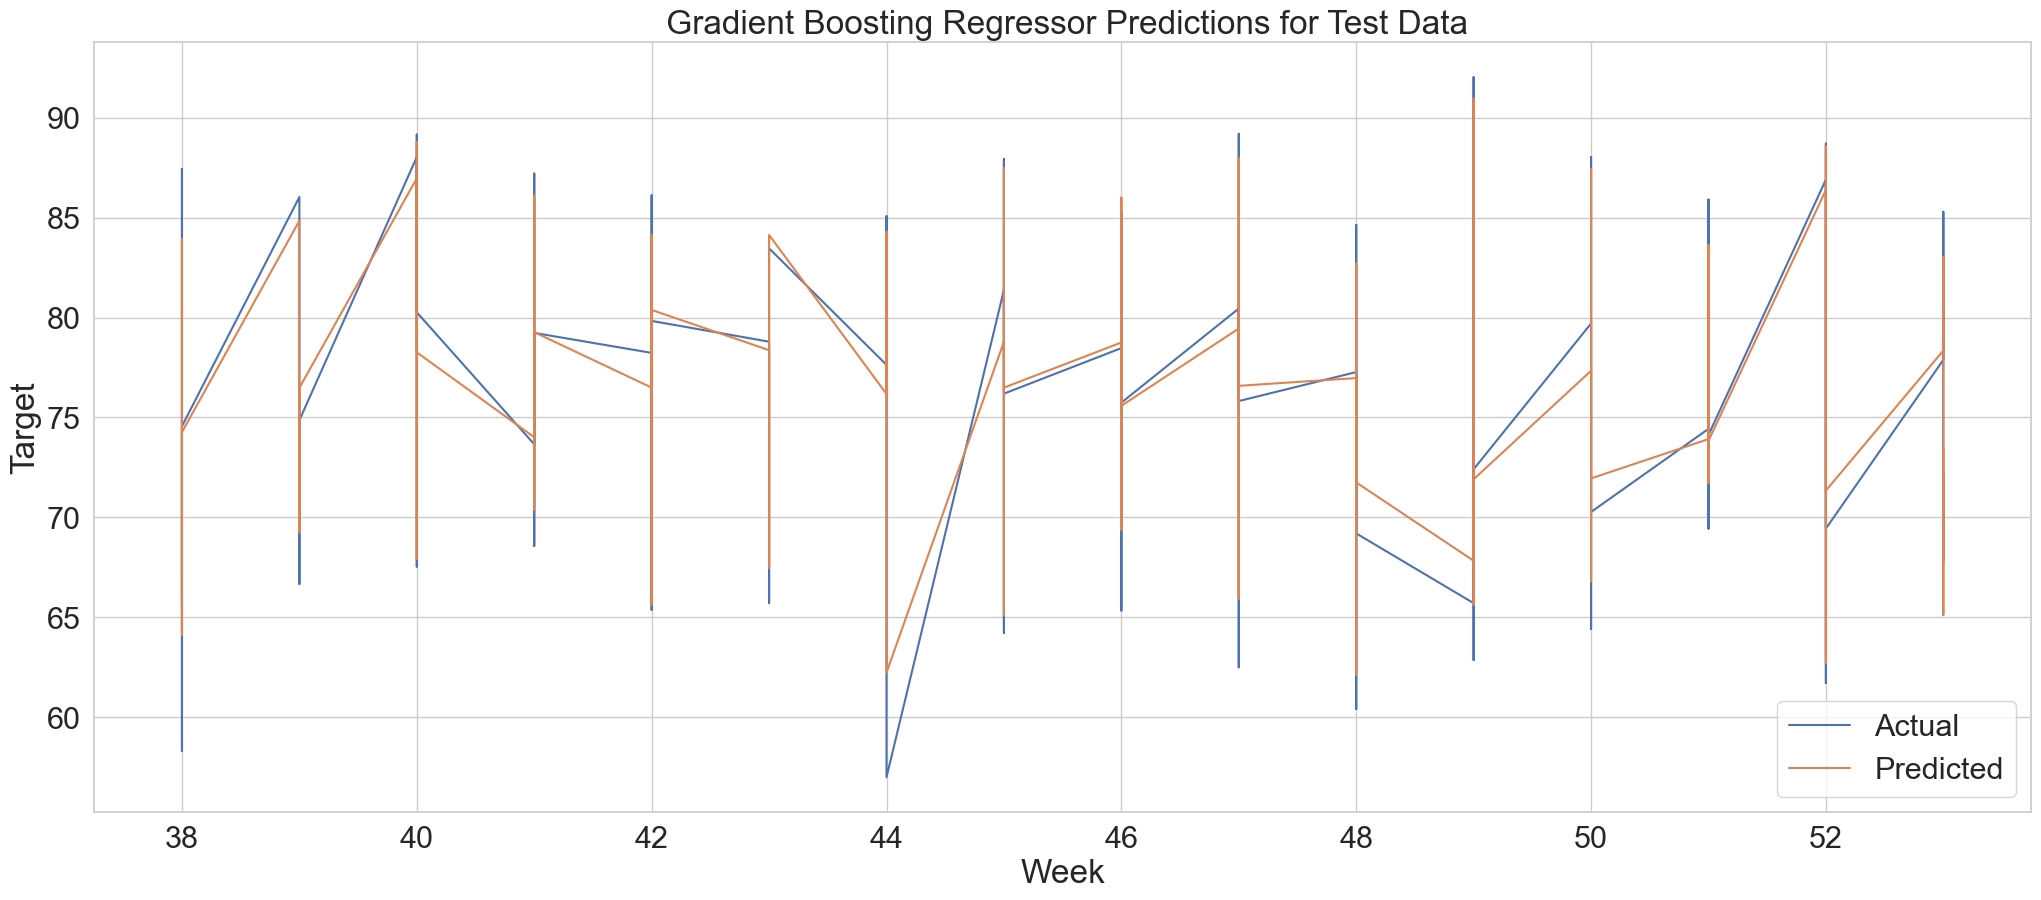

In [37]:
# Graph for Actual vs predicted values from Gradient Boosting Regressor model for test data 2022

plt.figure(figsize= (25,10))
plt.plot(X_testGBR1['WeekAligned'], y_testGBR1, label='Actual')
plt.plot(X_testGBR1['WeekAligned'], y_predGBR1, label='Predicted')

# set the plot labels and legend

plt.xlabel('Week')
plt.ylabel('Target')
plt.title(' Gradient Boosting Regressor Predictions for Test Data')
plt.legend(loc= 'lower right')


# display the plot
plt.show()

Predicted: 77.61, Expected: 78.40
Predicted: 77.12, Expected: 74.65
Predicted: 73.52, Expected: 69.55
Predicted: 76.70, Expected: 76.36
Predicted: 78.13, Expected: 78.93
Predicted: 78.95, Expected: 81.02
Predicted: 77.61, Expected: 75.88
Predicted: 80.31, Expected: 84.71
Predicted: 76.97, Expected: 74.32
Predicted: 77.65, Expected: 79.63
Predicted: 76.63, Expected: 77.78
Predicted: 77.68, Expected: 79.64
Predicted: 75.53, Expected: 68.10
Predicted: 80.75, Expected: 81.48
Predicted: 72.21, Expected: 67.54
Predicted: 76.58, Expected: 78.71
Predicted: 79.22, Expected: 78.46
Predicted: 79.01, Expected: 79.63
Predicted: 70.51, Expected: 70.26
Predicted: 72.19, Expected: 66.20
Predicted: 76.11, Expected: 74.38
Predicted: 75.42, Expected: 73.30
Predicted: 75.64, Expected: 76.72
Predicted: 83.22, Expected: 88.26
Predicted: 79.51, Expected: 79.50
Predicted: 75.29, Expected: 75.00
Predicted: 77.21, Expected: 78.88
Predicted: 75.13, Expected: 74.88
Predicted: 74.93, Expected: 71.88
Predicted: 70.

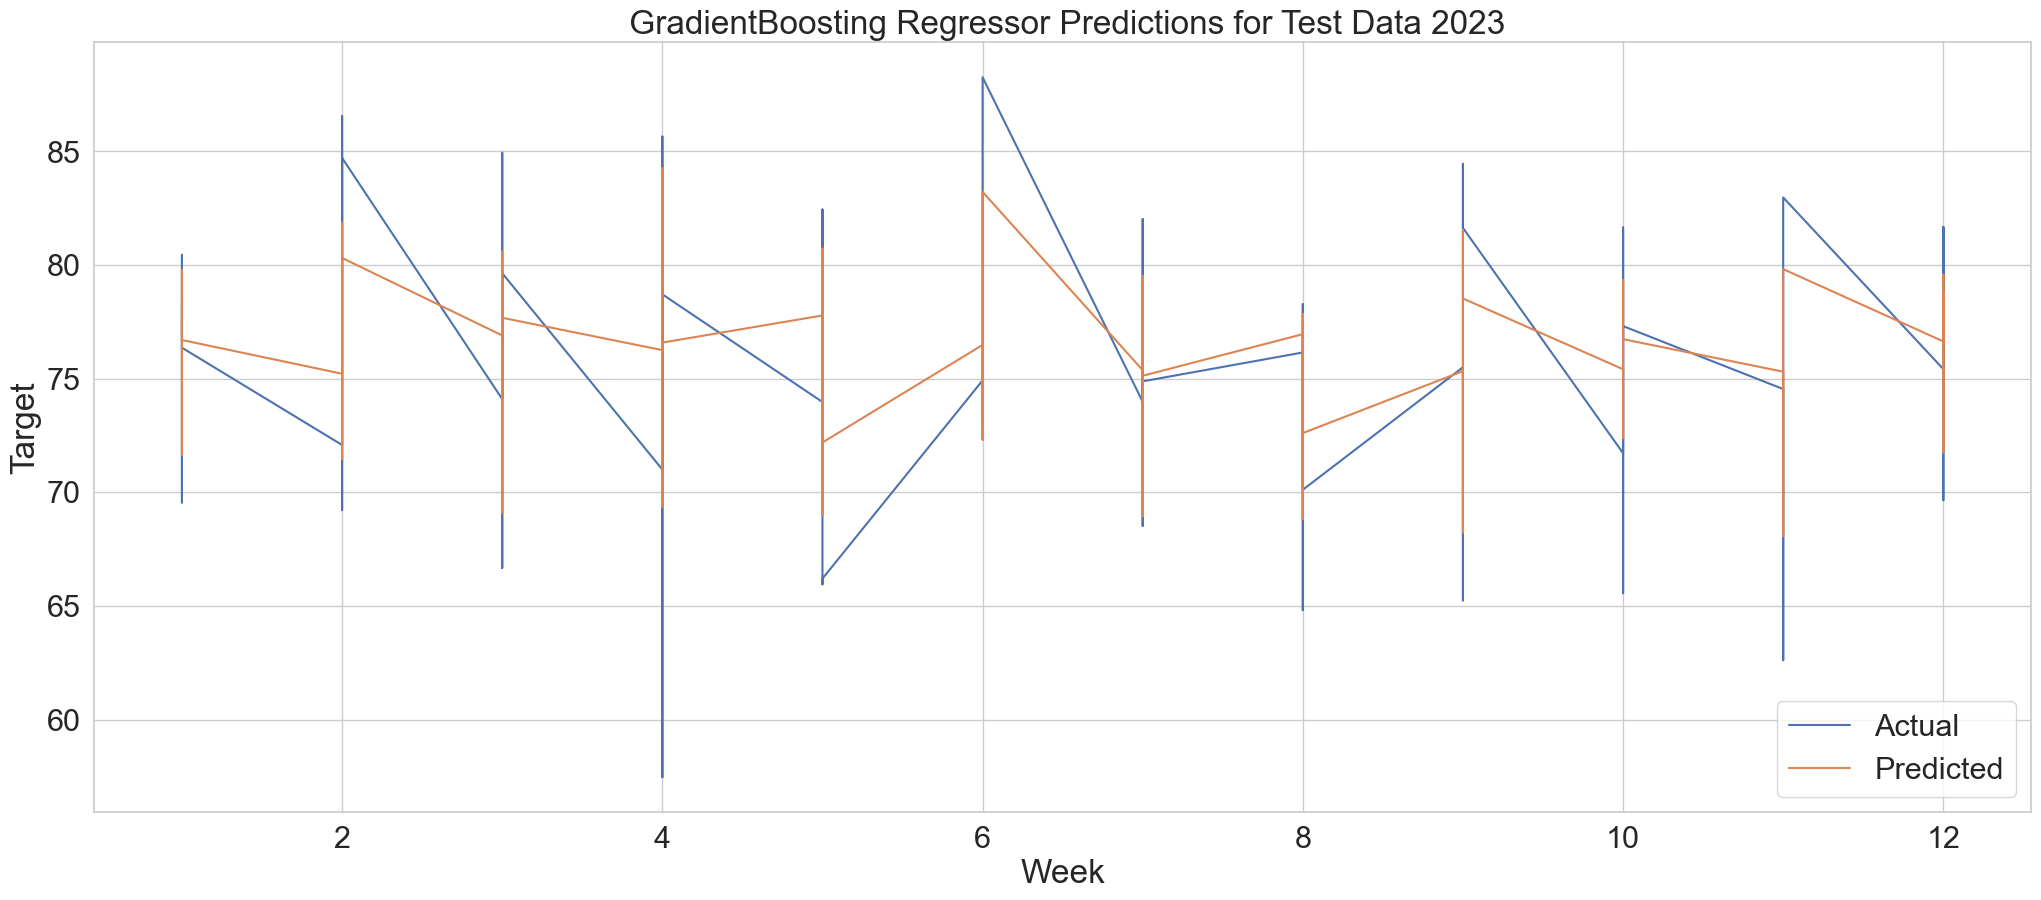

In [38]:
# Cross Validation of Gradient Boosting Regressor Model on dataset for 2023

Data23 = pd.read_excel('TestData23.xlsx')

TestData23 = Data23.loc[:, ['WeekAligned', 'PlannedAbsences','OtherPaidAbsences','UnpaidAbsences', 'UnplannedAbsences', 'ScheduledHours', 'Mean_Temp', 'snowfall_sum (cm)','Target']]


X_GBR23 = TestData23.drop('Target', axis=1)
y_GBR23 = TestData23['Target']

# Make predictions on Test data 2023

y_predGBR23 = gb_reg1.predict(X_GBR23)

#Predictive Analysis and Results

ExpectedGBR23 = y_GBR23
PredExpGBR23 = []
for p, e in zip(y_predGBR23[::5], ExpectedGBR23[::5]):  # check every 5th element 

  print(f'Predicted: {p:.2f}, Expected: {e:.2f}') 
  PredExpGBR23.append({'Predicted': p, 'Expected': e})


'''lambda implements y = mx + b '''

predictGBR23 = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)



# Graph for Actual and Predicted Attendance values from Gradient Boosting Regressor

plt.figure(figsize= (25,10))
plt.plot(X_GBR23['WeekAligned'], y_GBR23, label='Actual')
plt.plot(X_GBR23['WeekAligned'], y_predGBR23, label='Predicted')

# set the plot labels and legend

plt.xlabel('Week')
plt.ylabel('Target')
plt.title(' GradientBoosting Regressor Predictions for Test Data 2023')
plt.legend(loc= 'lower right')


# display the plot
plt.show()